<a href="https://colab.research.google.com/github/m-hossni/Tensorflow-and-Keras-INFO-6146-F24/blob/main/project%20files/Traditional/Supervised/Jack_CNN_TF_Keras_PROJECT24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CONVOLUTIONAL NEURAL NETWORK (CNN)**


---
## **Group 3**

**Ghazi Al Barakeh, Mohamed Ali, Maher Alqarra, Jack Ivanisevic, Muhammad Usman Raza**

**Coded by:** Jack Ivanisevic

---


In [ ]:
# Import all necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten
# import the MNIST Fashion dataset
from tensorflow.keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from tensorflow.keras.utils import plot_model

from sklearn.metrics import confusion_matrix
import seaborn as sns



In [ ]:
# Build the CNN model with an explicit Input layer
# Initialize a Sequential model. which allows us to build a neural network layer by layer in a linear stack.
model = models.Sequential()

# Add Input layer explicitly
# Add an explicit Input layer to the model. Define the shape of the input data, 28 pixels in height, 28 pixels in width, and 1 channel (grayscale).
model.add(layers.Input(shape=(28, 28, 1)))


# Add Convolutional layers with max-pooling
# Add a 2D convolutional layer with 32 filters, each of size 3x3. The ReLU activation function is applied, allowing the model to learn non-linear patterns.
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

# Add a max-pooling layer that downsamples the feature maps by taking the maximum value in each 2x2 block.
# Reduces the spatial dimensions and helps in reducing the number of parameters, making the model more efficient.
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer with 64 filters, using a 3x3 kernel. This layer extracts more complex features from the input data.
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer to further downsample the feature maps.
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add Flatten layer and Fully Connected Dense layers
model.add(layers.Flatten())

# Add a third convolutional layer with 64 filters. Allowing the model to learn even more complex features.
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 neurons (one for each class). The softmax activation function is applied to convert the outputs into probabilities,
# which sum to 1.
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
# Compiles the model, preparing it for training: optimizer='adam': Uses the Adam optimizer, which is popular for its efficiency.
# loss='sparse_categorical_crossentropy': Specifies the loss function for multi-class classification.
# metrics=['accuracy']: Indicates that accuracy will be tracked during training and evaluation.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
(x_train_split, y_train_split), (x_test, y_test) = fashion_mnist.load_data()

x_train_split, x_val_split,  y_train_split,y_val_split = train_test_split(x_train_split, y_train_split, test_size=0.3, shuffle=True)
print(x_train_split.shape)
print(y_train_split.shape)
print(x_val_split.shape)
print(y_val_split.shape)
x_train_split, x_val_split, x_test = x_train_split / 255.0, x_val_split / 255.0, x_test / 255.0

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)


In [ ]:
# history:variable that will store the results of the training process.
# The fit method returns a History object, which contains information about the loss and metrics (like accuracy) for each epoch during training.
# model.fit(...): start the training process.
# x_train_split, y_train_split: These are the inputs to the fit method:
#   x_train_split: The training images.
#   y_train_split: The corresponding labels for those training images.
# epochs=10: the number of epochs to train the model.
# validation_data=(x_val_split, y_val_split): provide the validation dataset that the model will use to evaluate its performance after each epoch.
#  x_val_split: The validation images.
# y_val_split: The corresponding labels for those validation images.
# The model will calculate the validation loss and accuracy at the end of each epoch, helping to monitor its performance and check for overfitting.
history = model.fit(x_train_split, y_train_split, epochs=10,
                    validation_data=(x_val_split, y_val_split))

(42000, 28, 28)
(42000,)
(18000, 28, 28)
(18000,)
Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 52s 38ms/step - accuracy: 0.9068 - loss: 0.2537 - val_accuracy: 0.9069 - val_loss: 0.2489
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.9137 - loss: 0.2328 - val_accuracy: 0.9072 - val_loss: 0.2493
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.9267 - loss: 0.2015 - val_accuracy: 0.9091 - val_loss: 0.2471
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 36ms/step - accuracy: 0.9316 - loss: 0.1839 - val_accuracy: 0.9141 - val_loss: 0.2354
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.9393 - loss: 0.1620 - val_accuracy: 0.9113 - val_loss: 0.2462
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9443 - loss: 0.1472 - val_accuracy: 0.9142 - val_loss: 0.2538
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9486 - loss: 0.1331 - val_accuracy: 0.9111 - val_loss: 0.2766
Epoch 8/10
1313/1313 ━━━━━

In [ ]:
# Evaluate on the test set
# Evaluates the model on the test set: model.evaluate(): This method calculates the loss and accuracy of the model on the provided test data (x_test and y_test).
# test_loss: Stores the calculated loss on the test set.
# test_acc: Stores the accuracy on the test set.
# verbose=2: show progress.
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

# Print the test accuracy as a percentage: test_acc * 100: Converts the accuracy from a fraction to a percentage.
# :.2f: Formats the output to two decimal places.
print(f'\nTest accuracy: {test_acc * 100:.2f}%')

# Make predictions on the test data:model.predict(x_test): Generate predictions for the test set images.
# Output an array of probabilities for each class (0-9) for every image.
# np.argmax(..., axis=-1): Retrieve the index of the maximum probability for each image, giving you the predicted class labels.
# The axis=-1 argument specifies that the operation should be performed along the last axis (the class probabilities).
y_test_pred = np.argmax(model.predict(x_test), axis=-1)

313/313 - 3s - 8ms/step - accuracy: 0.9081 - loss: 0.3300

Test accuracy: 90.81%
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


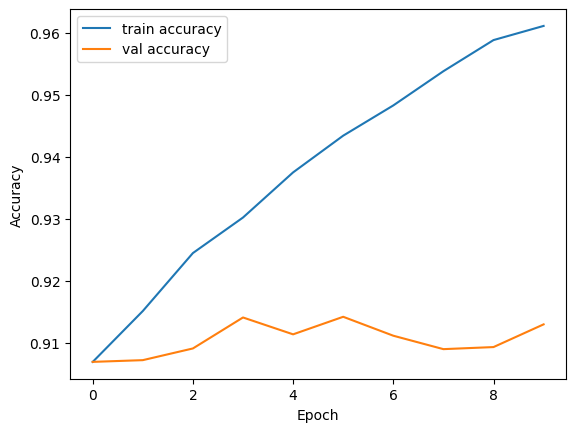

In [ ]:
# Plot the training accuracy: history.history['accuracy']: Accesses the list of training accuracy values collected during the training process.
# label='train accuracy': Sets the label for this line in the legend, indicating that this line represents the training accuracy.
plt.plot(history.history['accuracy'], label='train accuracy')

# Plot the validation accuracy: history.history['val_accuracy']: Accesses the list of validation accuracy values collected during training.
# label='val accuracy': Sets the label for this line in the legend, indicating that this line represents the validation accuracy.
plt.plot(history.history['val_accuracy'], label='val accuracy')

# Label the x-axis
plt.xlabel('Epoch')

# Label the y-axis
plt.ylabel('Accuracy')

# Display the legend
plt.legend()

# Dispaly the plot
plt.show()

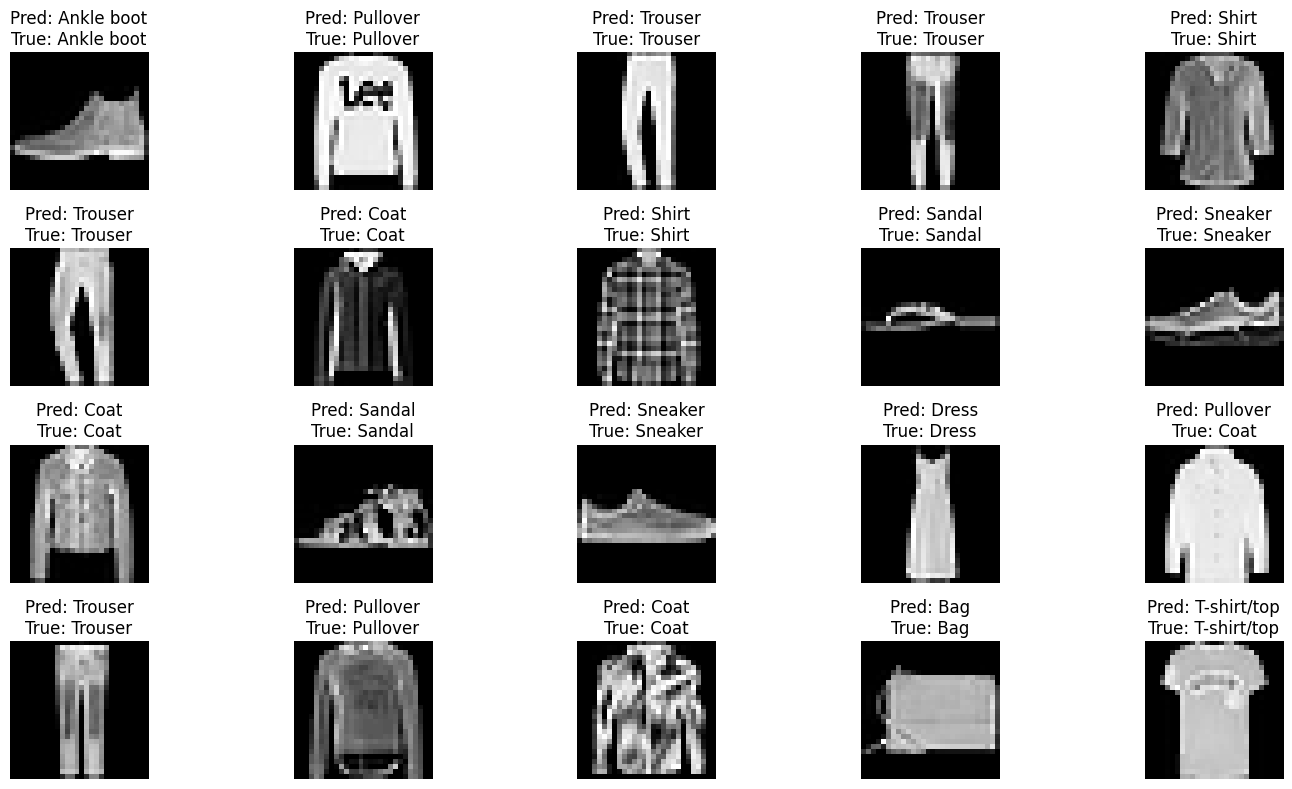

In [ ]:
# Define a dictionary to map numeric class labels (0-9) to their corresponding fashion item names. For easier interpretation of predictions and true labels.
fashion_labels = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress',
                  4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker',
                  8: 'Bag', 9: 'Ankle boot'}

# Display the first 20 images and predictions
# Create a new figure for plotting, 15 inches wide X 8 inches tall.
plt.figure(figsize=(15, 8))

# Start a loop that will iterate 20 times to display the first 20 images.
for i in range(20):
    # Create a subplot for each image in a 4-row by 5-column grid. The i + 1 ensures that each subplot gets a unique index.
    plt.subplot(4, 5, i+1)

    # Displays the i-th image from the test set. The image data is reshaped from a flat array (28x28 pixels) back into 2D format.
    # cmap='gray' argument specifies that the image should be displayed in grayscale.
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')

    # Retrieve the predicted label name for the i-th image using the y_test_pred array, which contains the predicted class indices.
    pred_label_name = fashion_labels[y_test_pred[i]]

    # Retrieve the true label name for the i-th image from the y_test array,using the fashion_labels dictionary for mapping.
    true_label_name = fashion_labels[y_test[i]]

    # Set teh title
    plt.title(f"Pred: {pred_label_name}\nTrue: {true_label_name}")

    # Remove the axis ticks and labels from the subplot for a cleaner look.
    plt.axis('off')

# Adjust the spacing between subplots to ensure they fit well within the figure and do not overlap.
plt.tight_layout()

# Display the figure
plt.show()

In [ ]:
  classes = {
    0:	'T-shirt/top',
    1:	'Trouser',
    2:	'Pullover',
    3:	'Dress',
    4:	'Coat',
    5:	'Sandal',
    6:	'Shirt',
    7:	'Sneaker',
    8:	'Bag',
    9:	'Ankle boot',
    }
confusion_mtrx = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

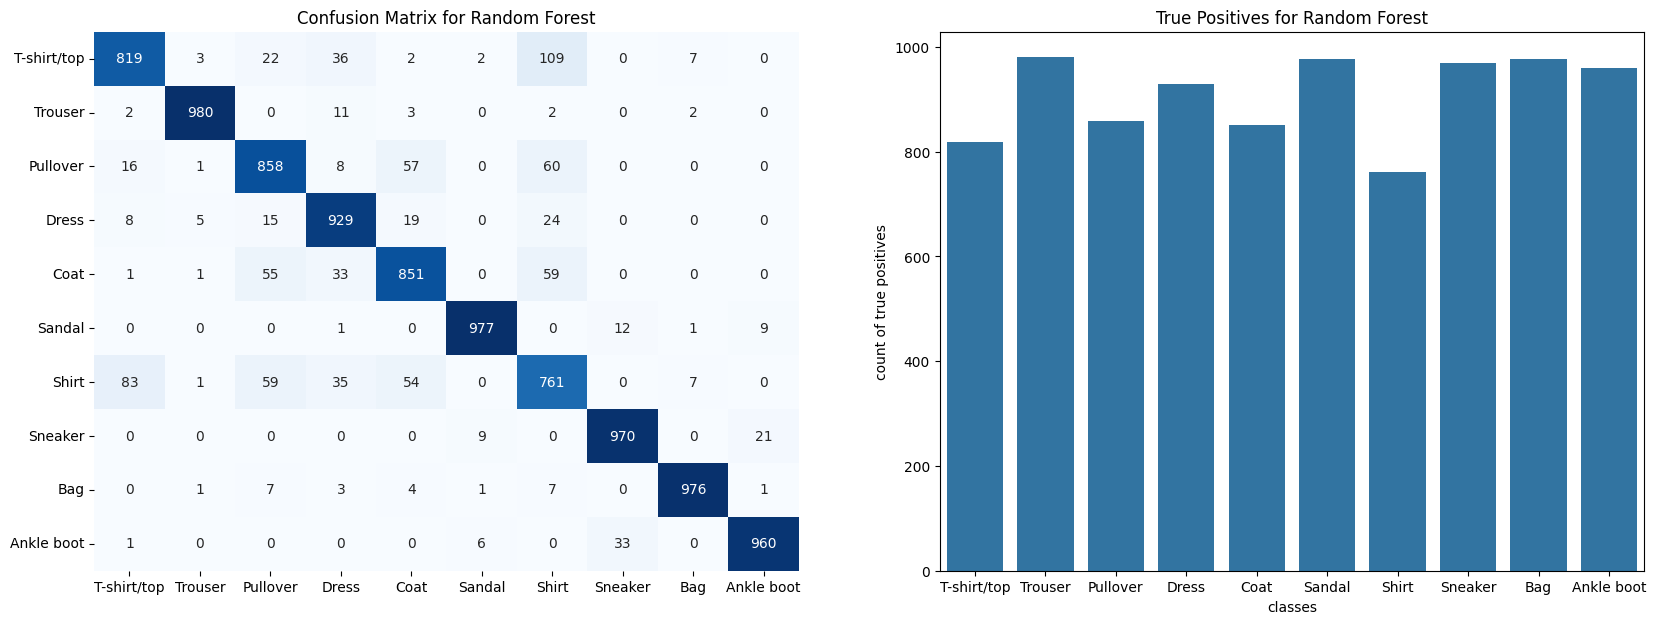

In [ ]:
fig = plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
sns.heatmap(confusion_mtrx,xticklabels=[value for value in classes.values()], yticklabels=[value for value in classes.values()],annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Random Forest')
plt.subplot(1,2,2)
sns.barplot(x=[value for value in classes.values()], y=np.diag(confusion_mtrx))
plt.title('True Positives for Random Forest')
plt.ylabel('count of true positives')
plt.xlabel('classes')
plt.show()

In [ ]:
import pandas as pd
conf_matrix = pd.DataFrame(confusion_mtrx)
conf_matrix.columns = [value for value in classes.values()]
conf_matrix.to_csv('CM_CNN.csv')